In [1]:
# import packages
import numpy
import pandas
import scipy
import sklearn
import matplotlib

In [2]:
# import wine data set, classification algorithms
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from __future__ import division
from matplotlib import pyplot

In [3]:
# load and assign wine data set 
wine = datasets.load_wine()

In [4]:
# assign features and labels
features = wine.data
labels = wine.target

In [5]:
# print feature names and count
print(wine.feature_names)
print(len(wine.feature_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13


In [6]:
# print target names and count
print(wine.target_names)
print(len(wine.target_names))

['class_0' 'class_1' 'class_2']
3


In [7]:
# display structure of data set
wine_pd = pandas.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = wine_pd
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()
# print(data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [8]:
# display count of rows and columns in data frame
def num_rows(data):
    return len(data)

print("Number of rows in data frame: %d" %num_rows(data))
print("Number of columns in data frame: %d" %len(data.columns))

Number of rows in data frame: 178
Number of columns in data frame: 15


In [9]:
# partition data set for training and testing (90/10)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1, random_state = 123, stratify = labels)

In [10]:
# revisit svm, define linear basis function rather than default radial basis function
classifier = svm.SVC(kernel = "linear")
# train svm
classifier.fit(train_features, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# make predictions
predictions = classifier.predict(test_features)
print predictions

[2 1 1 0 1 0 1 0 2 0 1 2 2 0 0 0 1 2]


In [12]:
# cross-validate
score = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        score += 1
print score/len(predictions)

# much better than both radial SVM (30%-40%) and random chance (33%),
# about the same as decision tree and random forest

0.944444444444


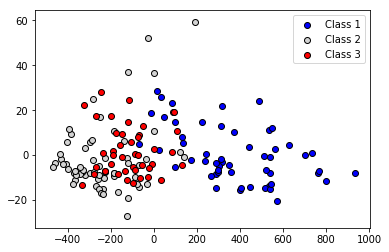

In [15]:
# pca and visualize along two pincipal components
pca = PCA(n_components = 2)
transformed_pd = pandas.DataFrame(pca.fit_transform(train_features))
transformed = pca.fit_transform(train_features)
classifier.fit(transformed, train_labels)

pyplot.scatter(transformed_pd[train_labels==0][0], transformed_pd[train_labels==0][1], label='Class 1', c='blue', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==1][0], transformed_pd[train_labels==1][1], label='Class 2', c='lightgrey', edgecolors = 'k')
pyplot.scatter(transformed_pd[train_labels==2][0], transformed_pd[train_labels==2][1], label='Class 3', c='red', edgecolors = 'k')

pyplot.legend()
pyplot.show()

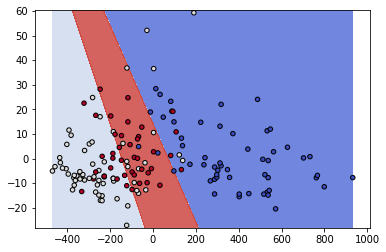

In [21]:
# decision boundary from linear SVM using principal components as measure along axes
h = 0.2
x_min, x_max = transformed[:,0].min() - 1, transformed[:, 0].max() + 1
y_min, y_max = transformed[:,1].min() - 1, transformed[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
Z = classifier.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pyplot.contourf(xx,yy,Z,cmap = pyplot.cm.coolwarm, alpha = 0.8)
pyplot.scatter(transformed[:,0], transformed[:,1], c = train_labels, cmap = pyplot.cm.coolwarm, s = 20, edgecolors = 'k')
pyplot.show()

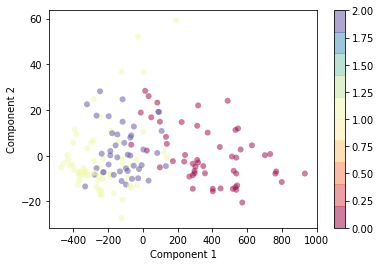

In [22]:
# second approach to PCA visualization
pca = PCA(n_components = 2)
transformed = pca.fit_transform(train_features)
pyplot.scatter(transformed[:, 0], transformed[:, 1], c=train_labels, edgecolor='none', alpha=0.5,
            cmap=pyplot.cm.get_cmap('Spectral', 10))
pyplot.xlabel('Component 1')
pyplot.ylabel('Component 2')
pyplot.colorbar();

In [ ]:
svmClassifier_2d = svm.LinearSVC(random_state=111).fit(transformed, train_labels)
for i in range(0, transformed.shape[0]):
    if train_labels[i] == 0:
        c1 = pyplot.scatter(transformed[i,0], transformed[i,1], c='r', s=50, marker='+')
    elif train_labels[i] == 1:
        c2 = pyplot.scatter(transformed[i,0], transformed[i,1], c='g', s=50, marker='o')
    elif train_labels[i] == 2:
        c3 = pyplot.scatter(transformed[i,0], transformed[i,1], c='b', s=50, marker='*')

pyplot.legend([c1, c2, c3], ['0', '1', '2'])
x_min, x_max = transformed[:, 0].min() - 1, transformed[:,0].max() + 1
y_min, y_max = transformed[:, 1].min() - 1, transformed[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, .01), numpy.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pyplot.contour(xx, yy, Z)
pyplot.title('Support Vector Machine Decision Surface')
pyplot.axis('off')
pyplot.show()